In [1]:
from keras.datasets import cifar100
from sklearn import datasets
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Normalization, Input
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.backend import categorical_crossentropy

from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

In [2]:
(x_train, y_train),(x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


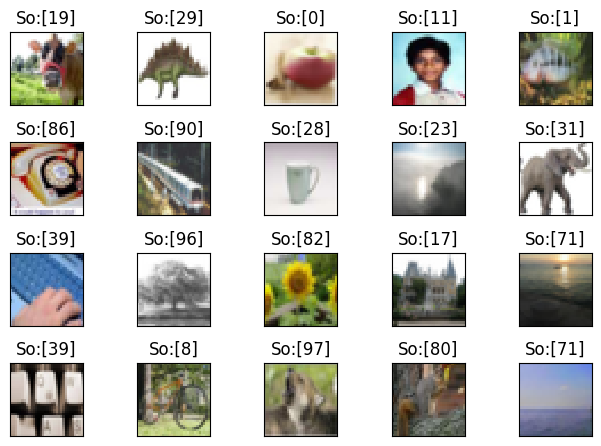

In [4]:
for i in range(20) :
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("So" ":{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
x_train = x_train.reshape(50000, 32, 32, 3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000, 32, 32, 3)
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
batch_size = 64
classes = 10
epochs = 20

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64,kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(128,kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation='softmax'))

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()

train = model.fit(x_train, y_train, batch_size, epochs=epochs, verbose=1)